In [3]:
#import all the required libraries to compute the data

import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
#Read the data from the UCI Machine learning Repository with URL:"https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",names=['Vendor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])
df.head()
df.shape

(209, 10)

In [5]:
#This gives us a very abstract details about what companies are included in the data
df['Vendor'].value_counts()

ibm             32
nas             19
ncr             13
honeywell       13
sperry          13
siemens         12
amdahl           9
cdc              9
burroughs        8
dg               7
harris           7
hp               7
c.r.d            6
dec              6
magnuson         6
ipl              6
prime            5
cambex           5
formation        5
nixdorf          3
perkin-elmer     3
gould            3
basf             2
wang             2
apollo           2
bti              2
four-phase       1
sratus           1
adviser          1
microdata        1
Name: Vendor, dtype: int64

In [6]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


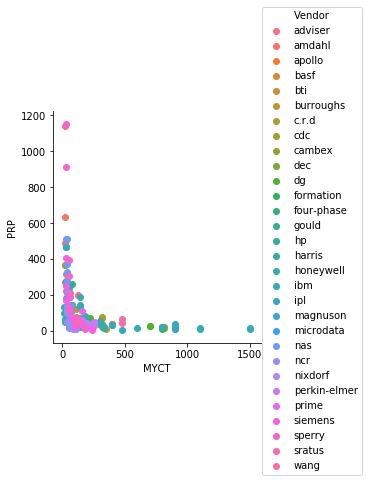

In [7]:
#seaborn plot to see how vendors fall between the machine cycle time and published performance
sns.FacetGrid(df,hue="Vendor",size=4)\
.map(plt.scatter,"MYCT","PRP").add_legend()
plt.show()

In [8]:
#Dropping the columns Vendor Name and Model names as they do not contribute much to the Prediction, 
#Also Drop the ERP column because it is the estimated performance rate that is given by the dataset providers

columns=['Vendor','Model','ERP']
df.drop(columns,axis=1,inplace=True)

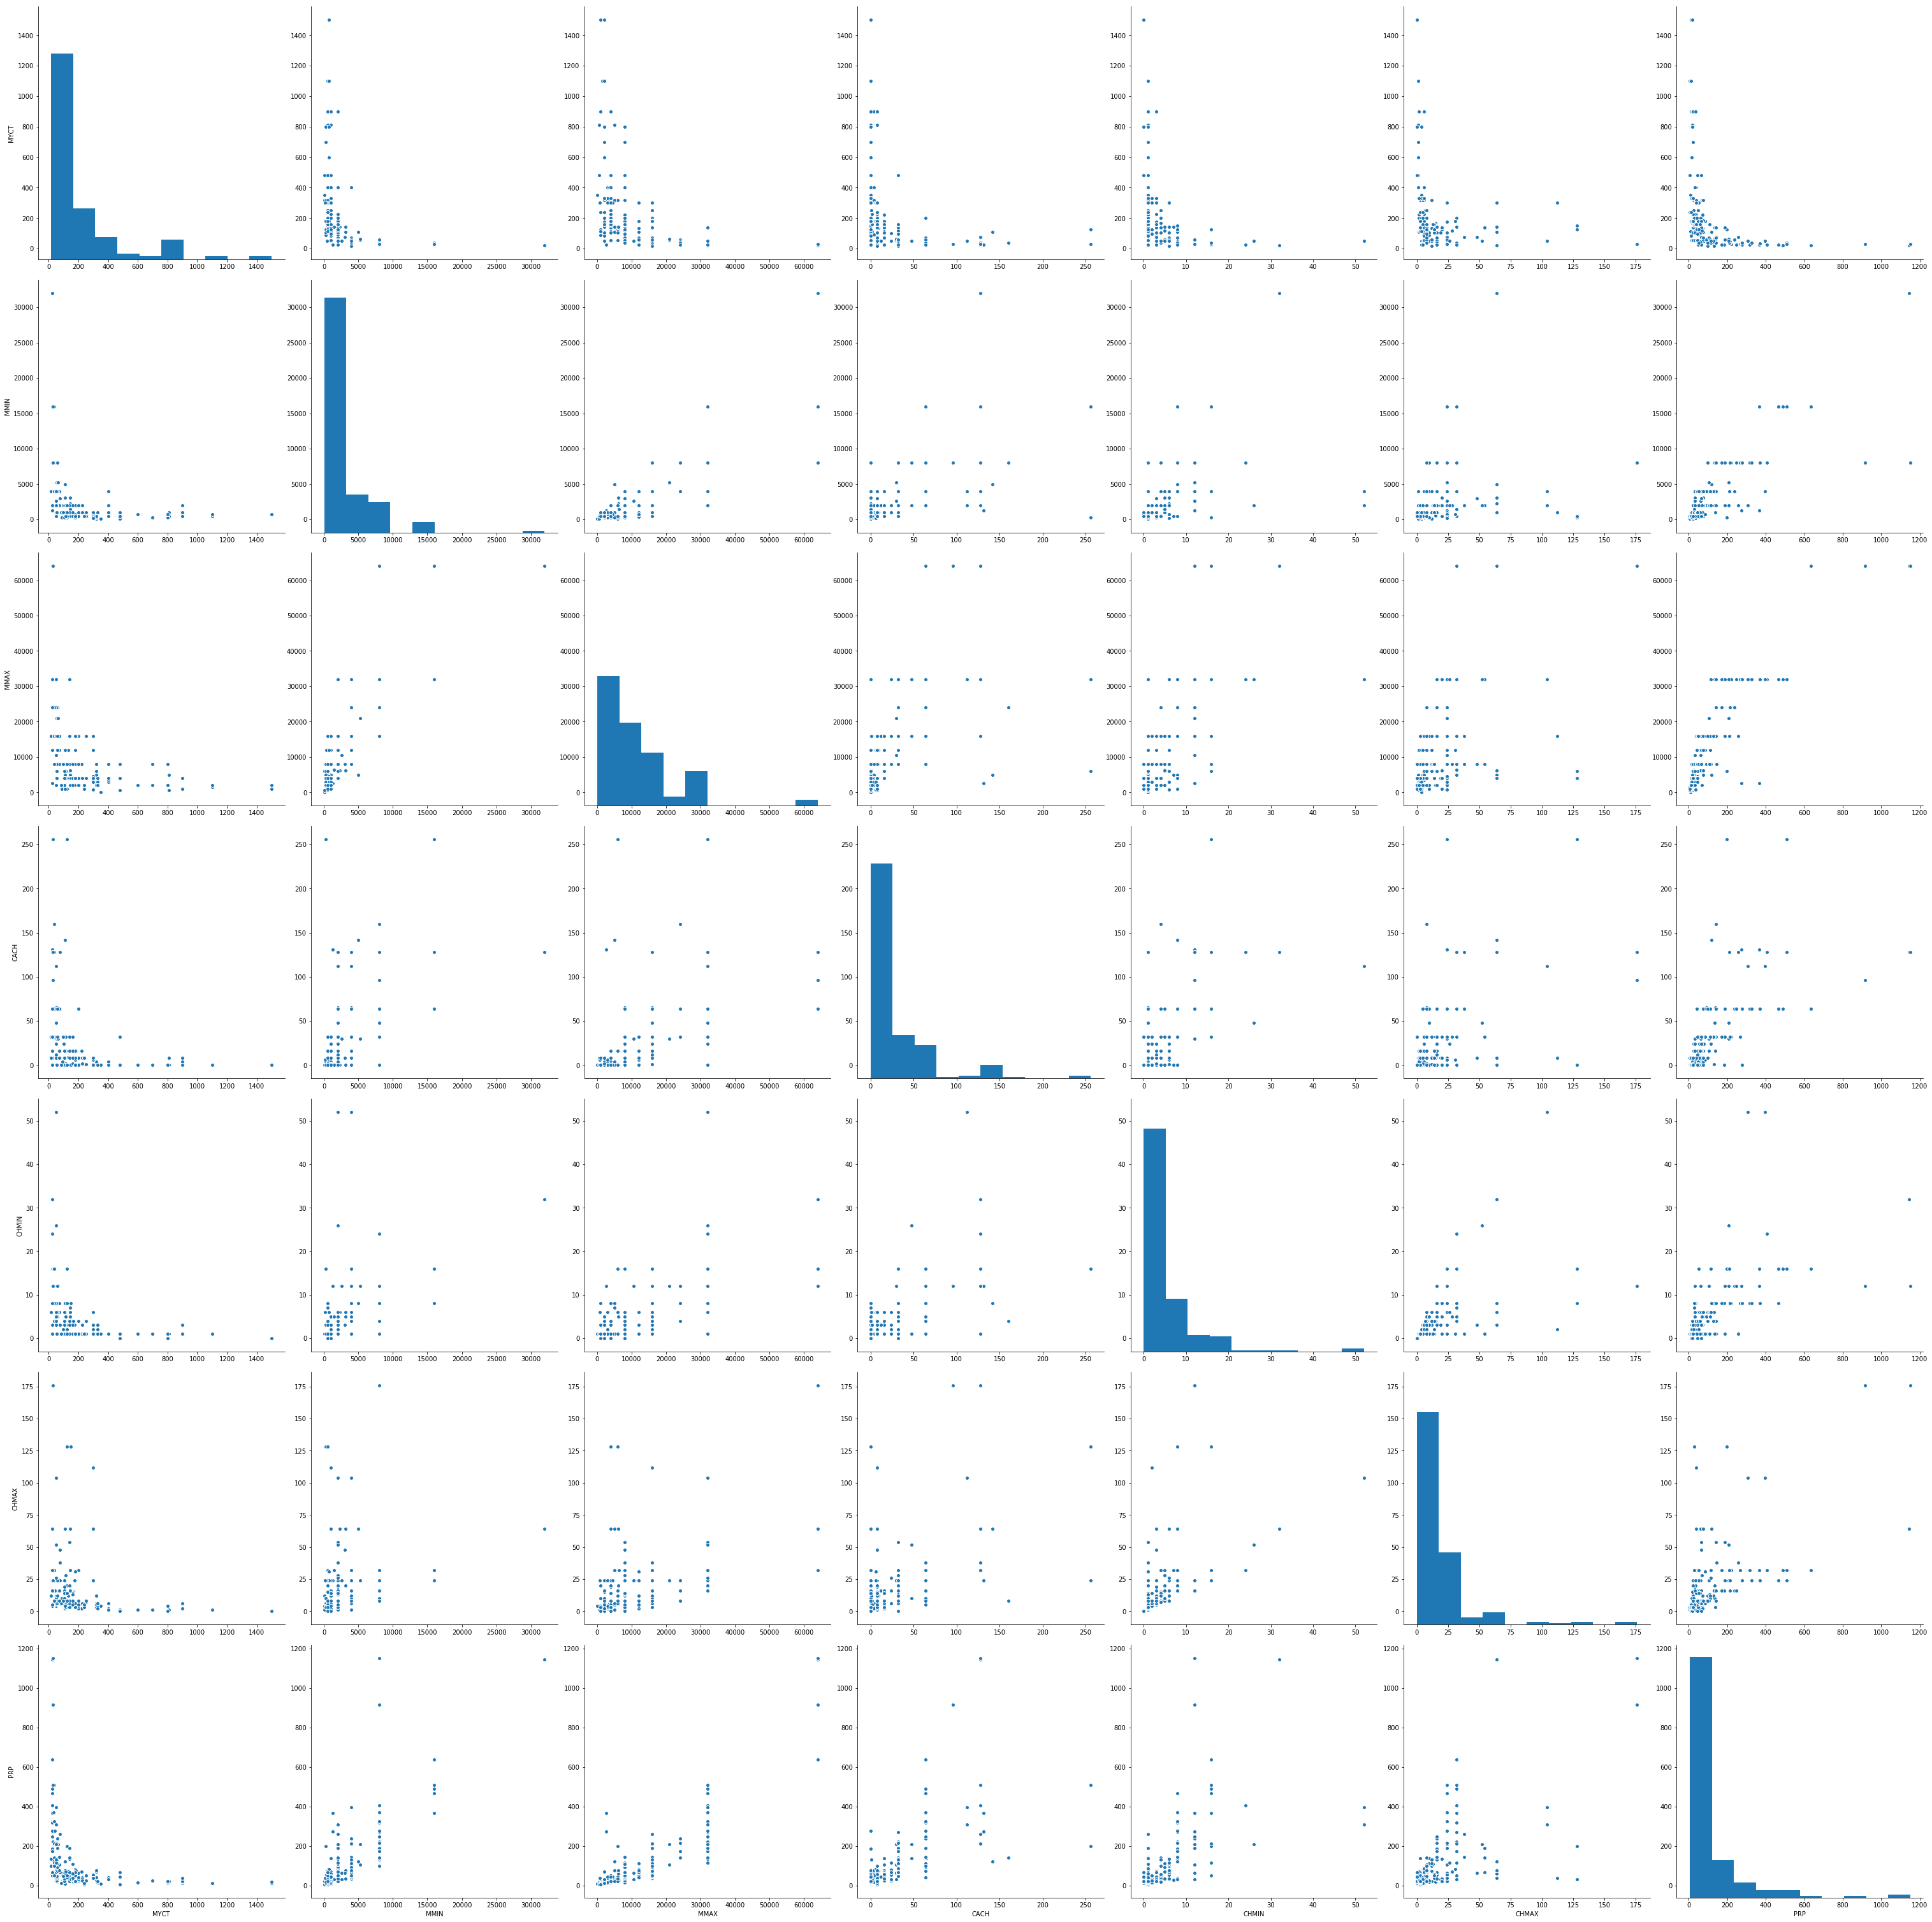

In [9]:
#Checking for pairplots 
sns.pairplot(df,size=6)
plt.show()

In [10]:
from sklearn import preprocessing
df.isnull().any()
df.isnull().sum()
X=np.array(df.drop(['PRP'],1))
X_normalize=preprocessing.scale(X)
y=np.array(df['PRP'])

C:\Users\bindu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [11]:
print(y.shape)

(209,)


In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train,X_test,y_train,y_test=train_test_split(X_normalize,y,test_size=0.2,random_state=1)
clf=LinearRegression()
clf.fit(X_train,y_train)
r2ScoreTrain=clf.score(X_train,y_train)
r2ScoreTest=clf.score(X_test,y_test)
print("r2_score  for training is:",r2ScoreTrain)
print("r2_score  for testing is:",r2ScoreTest)
y_pred1=clf.predict(X_test)
print('Coefficients for testing: \n', clf.coef_)
print('Intercepts for training: \n', clf.intercept_)

r2_score  for training is: 0.879499930961
r2_score  for testing is: 0.713704355503
Coefficients for testing: 
 [ 13.88326149  62.7116482   70.58810316  19.92925294  -3.6970514
  39.47064592]
Intercepts for training: 
 103.189082344


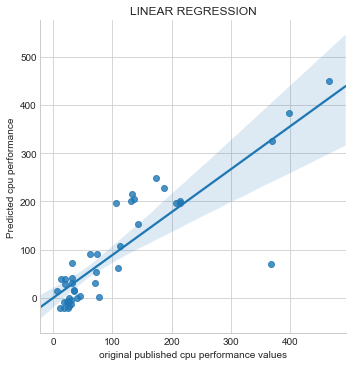

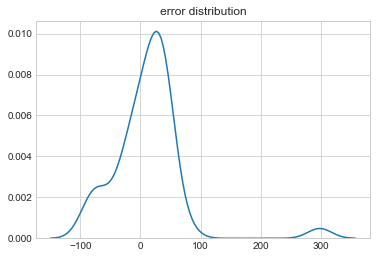

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':y_pred1}))
plt.title("LINEAR REGRESSION")
plt.show()

error=y_test-y_pred1
sns.kdeplot(np.array(error))
plt.title("error distribution")
plt.show()

## Observations:
### 1.Distribtion of error is centered towards zero its great(it means we have majority of errors values that are zero).
### 2.Target is reduce the errors in the distribution
### 3. So, we wanted to apply feature engineering with the help of polynomial Regression technique so the distribution of the data will be organised in a proper manner that helps to reduce the error distribution towards zero.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
X_poly = PolynomialFeatures(2)
X_poly=X_poly.fit_transform(X)  
X_poly_train,X_poly_test,Y_poly_train,Y_poly_test=train_test_split(X_poly,y,random_state=1)
clf=LinearRegression()
clf.fit(X_poly_train,Y_poly_train)
output=clf.predict(X_poly_test)
print("R2 SCORE on training score: {}".format(clf.score(X_poly_train,Y_poly_train)))
print("R2 SCORE on tesing score: {}".format(clf.score(X_poly_test,Y_poly_test)))
print('Coefficients for testing: \n', clf.coef_)
print('Coefficients for training: \n', clf.intercept_)

R2 SCORE on training score: 0.9721102991831799
R2 SCORE on tesing score: 0.8164187879374292
Coefficients for testing: 
 [ -1.03121925e-08   8.50905026e-02   2.50126240e-03   1.08956167e-03
   4.58771441e-01   5.87940196e+00   9.83977615e-01  -5.99274254e-05
  -6.27206712e-07   8.49829974e-07  -1.86270049e-03  -4.30749876e-03
  -5.90581814e-03   9.77733941e-07   2.32020858e-07  -1.15495766e-04
  -1.11707112e-03   2.36100466e-04  -9.01965792e-09   5.15167329e-05
  -3.22801676e-05   1.15060284e-05  -2.58841442e-03   6.46199655e-02
   3.94492103e-03   1.73203049e-01  -2.18503969e-01   7.83535384e-03]
Coefficients for training: 
 -0.73720446801


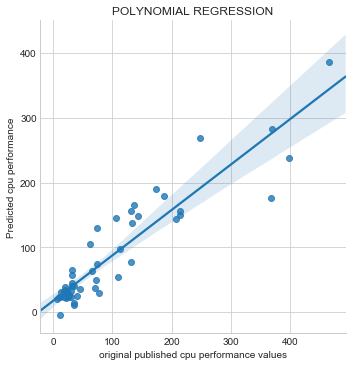

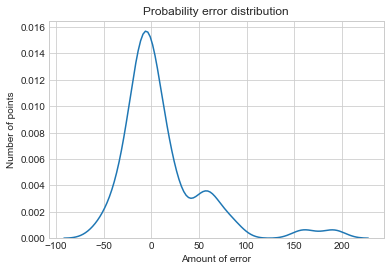

In [15]:
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':Y_poly_test,'Predicted cpu performance':output}))
plt.title("POLYNOMIAL REGRESSION")
plt.show()
error=Y_poly_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

## Observations:
### 1. As we can see from the above error distribution plot, overall error is reduced and error is centered to zero one main observation is variance of error in the distribution is significantly reduced when we applied polynomial regression technique.

In [16]:
## Applying bayesian ridge regression ...

In [17]:
from sklearn.linear_model import BayesianRidge
bay_clf=BayesianRidge()
bay_clf.fit(X_train,y_train)
output=bay_clf.predict(X_test)

In [18]:
print("The training score given by BayesianRidgeRegression {}".format(bay_clf.score(X_train,y_train)))
print("The testing score given by Baysian Ridgeregression {}".format(bay_clf.score(X_test,y_test)))

print("Coefficients given by Baysian Ridgeregression {}".format(bay_clf.coef_))
print("Intercepts given by Baysian Ridgeregression {}".format(bay_clf.intercept_))


The training score given by BayesianRidgeRegression 0.8794522753486084
The testing score given by Baysian Ridgeregression 0.7183582433537423
Coefficients given by Baysian Ridgeregression [ 13.42055879  61.98804101  69.88955647  20.04503542  -2.70568795
  39.01936928]
Intercepts given by Baysian Ridgeregression 103.2391305971257


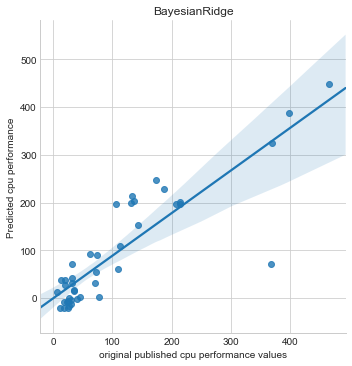

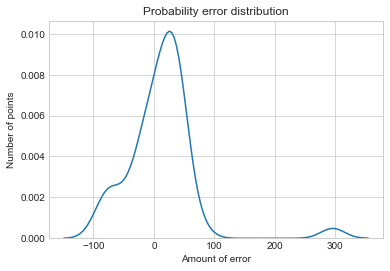

In [19]:
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':output}))
plt.title("BayesianRidge")
plt.show()
error=y_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

In [20]:
### Applying polynomial Bayesian Ridge regression

In [21]:
bay_clf1=BayesianRidge()
bay_clf1.fit(X_poly_train,Y_poly_train)
output=bay_clf1.predict(X_poly_test)

In [22]:
print("The training score given by BayesianRidgeRegression {}".format(bay_clf1.score(X_poly_train,Y_poly_train)))
print("The testing score given by Baysian Ridgeregression {}".format(bay_clf1.score(X_poly_test,Y_poly_test)))

print("Coefficients given by Baysian Ridgeregression {}".format(bay_clf1.coef_))
print("Intercepts given by Baysian Ridgeregression {}".format(bay_clf1.intercept_))

The training score given by BayesianRidgeRegression 0.9578532690364394
The testing score given by Baysian Ridgeregression 0.7362331759516667
Coefficients given by Baysian Ridgeregression [  1.46695276e-14  -1.58777605e-05   8.92609552e-04   1.54187002e-03
   1.10040061e-05   1.74848440e-06   9.32422439e-07  -9.94960893e-06
   2.84337601e-06  -1.68217988e-06   1.37046898e-04   5.24901370e-06
  -4.78744314e-04   8.71271794e-08   2.03734629e-07  -1.11393905e-04
  -2.07255518e-04   3.29866990e-04  -7.56623381e-10   7.77610587e-05
  -2.50129475e-05  -8.81411821e-06   7.92000040e-04   1.30488996e-04
   3.64107755e-04  -2.32260250e-06  -2.16147059e-05  -2.10172638e-04]
Intercepts given by Baysian Ridgeregression 26.09360859508331


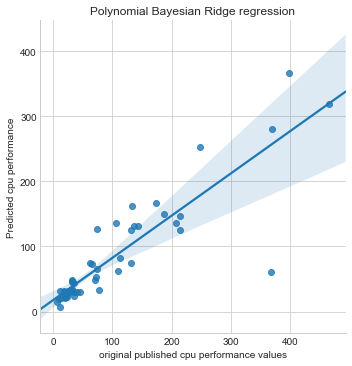

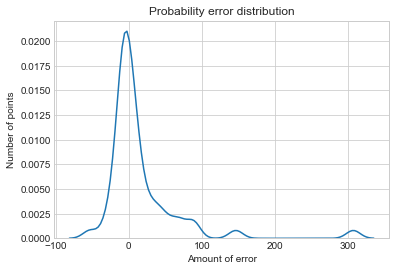

In [23]:
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':Y_poly_test,'Predicted cpu performance':output}))
plt.title("Polynomial Bayesian Ridge regression")
plt.show()
error=Y_poly_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

## Support Vector Machines..

In [24]:
from sklearn import svm
svr_clf2=svm.SVR()
svr_clf2.fit(X_train,y_train)
output=svr_clf2.predict(X_test)
print("r2_score for svm_regression:{}".format(svr_clf2.score(X_train,y_train)))
print("r2_score for svm_regression:{}".format(svr_clf2.score(X_test,y_test)))

print("Support for svm_regression:{} ".format(len(svr_clf2.support_)))


r2_score for svm_regression:-0.02588841943933673
r2_score for svm_regression:-0.026993756794967627
Support for svm_regression:166 


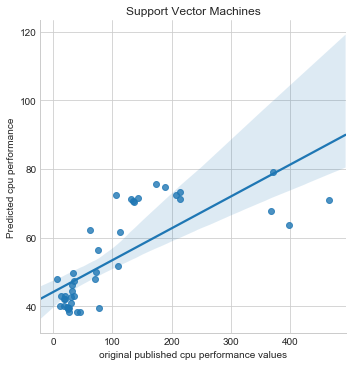

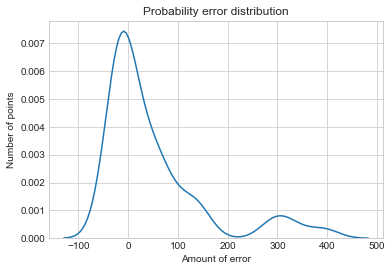

In [25]:
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':output}))
plt.title("Support Vector Machines")
plt.show()
error=y_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
search_range=[{'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]},{'gamma':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}]
svr_reg1=GridSearchCV(svm.SVR(),search_range,scoring='r2',cv=10)
svr_reg1.fit(X_train,y_train)
print(svr_reg1.best_estimator_)
print("R2_SCORE for Traing_score:",svr_reg1.score(X_train,y_train))
print("R2_SCORE for Testing_score:",svr_reg1.score(X_test,y_test))

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2_SCORE for Traing_score: 0.98446005542
R2_SCORE for Testing_score: 0.899997070714


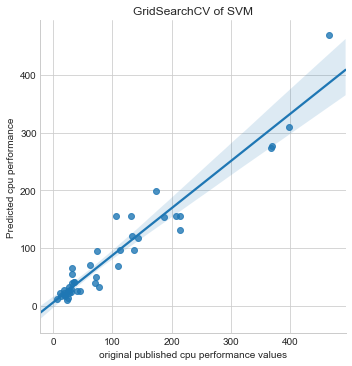

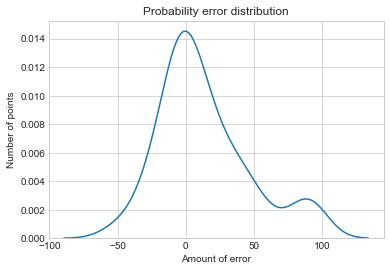

In [27]:
output=svr_reg1.predict(X_test)
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':output}))
plt.title("GridSearchCV of SVM")
plt.show()
error=y_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

## K-NearestNeighbor Regressor...

In [28]:
from sklearn import neighbors
k_neigh=np.arange(1,30,2)
search_range=[{'n_neighbors':k_neigh}]
knn_reg=GridSearchCV(neighbors.KNeighborsRegressor(),search_range,scoring='r2',cv=10)
knn_reg.fit(X_train,y_train)
print(knn_reg.best_estimator_)
print("r2_score for Training knn_reg {}".format(knn_reg.score(X_train,y_train)))
print("r2 score for Testing knn_reg {}".format(knn_reg.score(X_test,y_test)))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')
r2_score for Training knn_reg 0.9930106547971913
r2 score for Testing knn_reg 0.8461244414384788


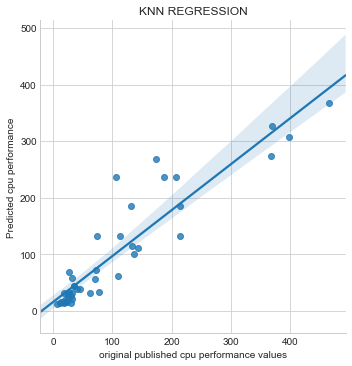

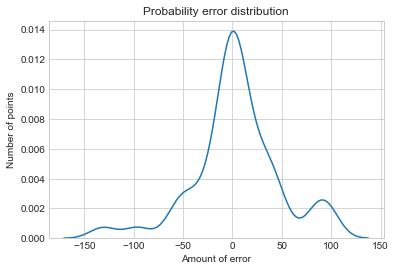

In [29]:
output=knn_reg.predict(X_test)
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':output}))
plt.title("KNN REGRESSION")
plt.show()
error=y_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

In [30]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from collections import Counter

C:\Users\bindu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
# X_train stands training set and X_test for testing set.......
#Y_train for training labels and Y_test for testing labels............
x_train,x_test,Y_train,Y_test=cross_validation.train_test_split(X,y,random_state=0)
#Further more splitting of training data for getting validation set to predict the right K.......
X11_train,X11_validation,Y11_train,Y11_validation=cross_validation.train_test_split(x_train,Y_train,test_size=0.3,random_state=0)
X11_validation.shape

(47, 6)

In [32]:
def cross_validation_score_for_several_K_values(X_train,X_validation,Y_train,Y_validation):
    err=[]
    for i in range(1,30,2):
        knn=KNeighborsClassifier(i)
        knn.fit(X_train,Y_train)
        predicted_cross_validation_values=knn.predict(X_validation)
        error=(1/X_validation.shape[0])*np.sum(Y_validation-predicted_cross_validation_values)**2
        print("Cross-validation error for my k={} is {}".format(i,error))
        err.append(err)

In [33]:
cross_validation_score_for_several_K_values(X11_train,X11_validation,Y11_train,Y11_validation)

Cross-validation error for my k=1 is 9072.531914893616
Cross-validation error for my k=3 is 33832.36170212766
Cross-validation error for my k=5 is 51712.36170212766
Cross-validation error for my k=7 is 56045.29787234042
Cross-validation error for my k=9 is 47617.36170212766
Cross-validation error for my k=11 is 47046.14893617021
Cross-validation error for my k=13 is 47490.127659574464
Cross-validation error for my k=15 is 65085.127659574464
Cross-validation error for my k=17 is 67034.5744680851
Cross-validation error for my k=19 is 63017.89361702128
Cross-validation error for my k=21 is 58559.17021276596
Cross-validation error for my k=23 is 56045.29787234042
Cross-validation error for my k=25 is 47426.574468085106
Cross-validation error for my k=27 is 43569.382978723406
Cross-validation error for my k=29 is 30383.51063829787


## Decision-Tree Regressor.

In [34]:
from sklearn.tree import DecisionTreeRegressor
dec_tree=DecisionTreeRegressor(random_state=0)
print(dec_tree.fit(X_train,y_train))
print("Training r2_score is {}".format(dec_tree.score(X_train,y_train)))
print("Testing r2_score is {}".format(dec_tree.score(X_test,y_test)))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Training r2_score is 0.99674830865641
Testing r2_score is 0.8587616515663343


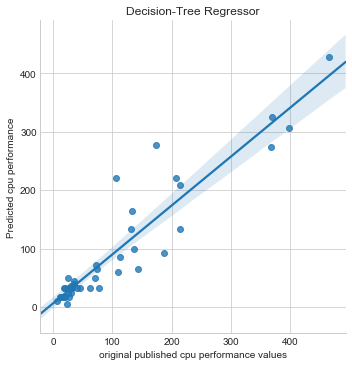

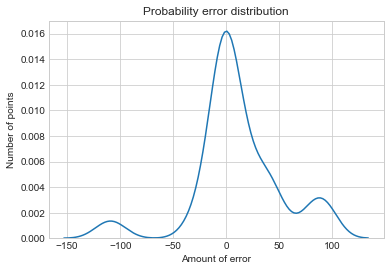

In [35]:
output=dec_tree.predict(X_test)
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':output}))
plt.title("Decision-Tree Regressor")
plt.show()
error=y_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

### Choosing the right hyperparameter depth to avoid overfitting..

In [36]:
depth_range=[{'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12]}]
decision_tree=GridSearchCV(DecisionTreeRegressor(criterion='mse',random_state=0),depth_range,scoring='r2',cv=10)
decision_tree.fit(X_train,y_train)
print(decision_tree.best_estimator_)
print("Training_r2_score:{}".format(decision_tree.score(X_train,y_train)))
print("Testing_r2_score:{}".format(decision_tree.score(X_test,y_test)))

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Training_r2_score:0.9941417278543623
Testing_r2_score:0.8750089481049828


## Bagging..
### Choosing the right number of trees in the random forest is the key to better results..

In [37]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0,n_jobs=-1)
print(random_forest.fit(X_train, y_train))
print("Training_r2_score:{}".format(random_forest.score(X_train,y_train)))
print("Testing_r2_score:{}".format(random_forest.score(X_test,y_test)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Training_r2_score:0.9719229638103704
Testing_r2_score:0.8883709813751505


In [38]:
from sklearn.ensemble import RandomForestRegressor
trees_in_forest=[{'n_estimators':np.arange(1,25,5)}]
random_forest=GridSearchCV(RandomForestRegressor(random_state=0,n_jobs=-1),trees_in_forest,scoring='r2',cv=10)
random_forest.fit(X_train, y_train)
print(random_forest.best_estimator_)
print("Training_r2_score:{}".format(random_forest.score(X_train,y_train)))
print("Testing_r2_score:{}".format(random_forest.score(X_test,y_test)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Training_r2_score:0.9817751483306185
Testing_r2_score:0.9199904658711162


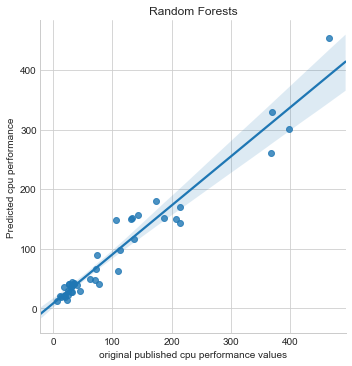

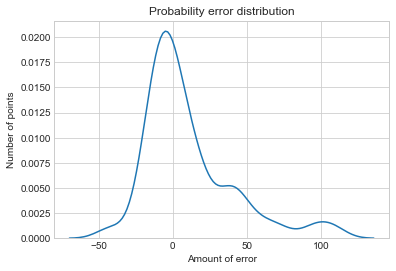

In [39]:
output=random_forest.predict(X_test)
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':output}))
plt.title("Random Forests")
plt.show()
error=y_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

## Extra-Trees

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree = ExtraTreesRegressor(bootstrap=True,random_state=0)
print(extra_tree.fit(X_train,y_train))
print("R2_score for extra_tree_classifier:{}".format(extra_tree.score(X_train,y_train)))
print("R2_score for extra_tree_classifier: {}".format(extra_tree.score(X_test,y_test)))

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)
R2_score for extra_tree_classifier:0.9773628282948064
R2_score for extra_tree_classifier: 0.8946999994072957


In [41]:
trees_in_forest=[{'n_estimators':np.arange(30,90,1)}]
extra_tree=GridSearchCV(RandomForestRegressor(random_state=0,n_jobs=-1),trees_in_forest,scoring='r2',cv=10)
extra_tree.fit(X_train, y_train)
print(extra_tree.best_estimator_)
print("Training_r2_score:{}".format(extra_tree.score(X_train,y_train)))
print("Testing_r2_score:{}".format(extra_tree.score(X_test,y_test)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=68, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Training_r2_score:0.9861289892354653
Testing_r2_score:0.9103812966684149


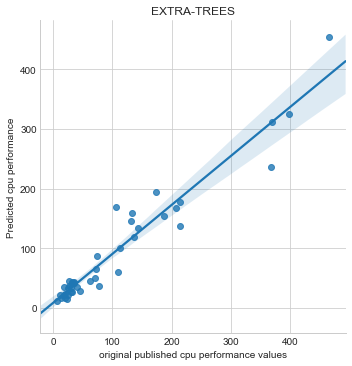

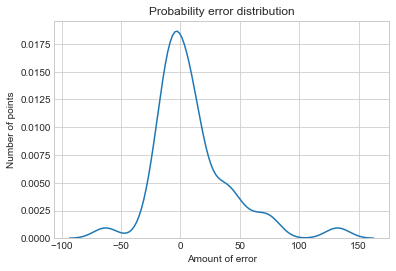

In [42]:
output=extra_tree.predict(X_test)
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':output}))
plt.title("EXTRA-TREES")
plt.show()
error=y_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

## Boosting using GradientBoostingDecisionTrees..

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
print(clf)
print("Training_score:{}".format(clf.score(X_train,y_train)))
print("Testing_score:{}".format(clf.score(X_test,y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)
Training_score:0.9934594539871406
Testing_score:0.9169590212195388


### Sklearn implementation of GradientBoostingTrees will take more time to train very small amount of data and gradient boosting trees cannot be trivially parallelized.Thats why i see n_jobs option absent here..

## Hyperparameters to control here are learning_rate and no of trees and depth of the tree...
### 1.One key idea in boosting is we need to keep the depth of tree as less as possible because boosting is applied to the models with high bias and low-variance..
###  2.when there is decrease in bias at the same time the variance in the model might increase

### 3.So controlling learning rate is essential to avoid overfit or underfit
### 4. Applying subsample <1 here is similar to row sampling in the boot strap technique.
### 5.Column sampling is not implemented here in sklearn gradient boosting trees.if implemented we got one more level of randomness...
### 6.Only decision-tree can be applied as base learners or estimators other algorithm like linear regression cannot be applied.

In [44]:
depth=np.arange(1,5,1)
learning_rate=[1,0.1,0.01,0.001,0.0001,0.00001]
trees_in_boosting=np.arange(100,500,100)
row_samples=[0.4,0.5,0.6,0.7,0.8]
controller=[{'max_depth':depth},{'learning_rate':learning_rate},{'n_estimators':trees_in_boosting},{'subsample':row_samples}]
boosting_tree=GridSearchCV(GradientBoostingRegressor(random_state=0),controller,scoring='r2',cv=10)
boosting_tree.fit(X_train, y_train)
print(boosting_tree.best_estimator_)
print("Training_r2_score:{}".format(boosting_tree.score(X_train,y_train)))
print("Testing_r2_score:{}".format(boosting_tree.score(X_test,y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=0.4, verbose=0, warm_start=False)
Training_r2_score:0.9880518621093645
Testing_r2_score:0.9081562594074961


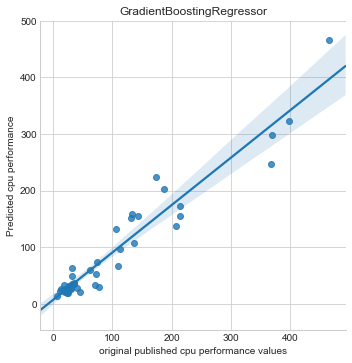

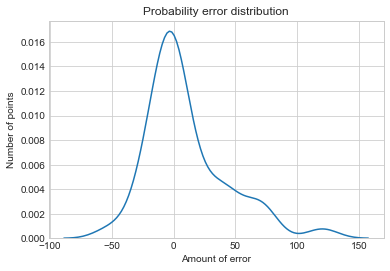

In [45]:
output=boosting_tree.predict(X_test)
import matplotlib.pyplot as plt
sns.lmplot(x='original published cpu performance values',y='Predicted cpu performance',data=pd.DataFrame({'original published cpu performance values':y_test,'Predicted cpu performance':output}))
plt.title("GradientBoostingRegressor")
plt.show()
error=y_test-output
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(error))
plt.title("Probability error distribution")
plt.xlabel("Amount of error")
plt.ylabel("Number of points")
plt.show()

### STOCHASTIC GRADIENT DESCENT Vs GRADIENT DESCENT  A small experiment to check how general gradient descent works  when compared to Stochastic gradient descent

In [51]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 12 18:22:10 2018
"""
import numpy as np
import pandas as pd
from sklearn import cross_validation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Function to calculate error 
def calculate_error(c,m,X,Y):
    totalError=0
    N = len(X)
    for i in range(N):
        x=X.iloc[i]
        y=Y[i]
        totalError += (1/10000)*(y-(np.sum(m*x)+c))**2
    return totalError


#This function uses Gradient descent algorithm and
#gives us the coefficients for 10,000 iterations in my case  
# m_gradient = np.zeros(len(X.columns)-1)
def gradient_descent(X, y, starting_c, starting_m, learning_rate,
                            num_iterations):
    c=starting_c
    m=starting_m
        
    for i in range(num_iterations):
        c,m =step_gradient(c,m,X,y,learning_rate)
        print("The  m is {} and c is {} and cost {}".format(m,c,calculate_error(c,m,X,y)))
    return [c,m]

#calculate step gradient for each iteration at a learning rate of 0.0001
def step_gradient(c_current,m_current,X,Y,learning_rate):
    c_gradient = 0
    m_gradient = np.zeros(len(m_current))
    N = len(X)
    for i in range(N):
        x=X.iloc[i]
        y=Y[i]
        cc= -(2/N)*(y-((np.sum(m_current*x))+c_current))
        c_gradient +=cc
        m_gradient =m_gradient+cc*x
         
    new_c = c_current- (learning_rate*c_gradient)
    new_m = m_current - (learning_rate*m_gradient)
    return [new_c, new_m]           


# Train the model 
def training(X_train,y_train):
    learning_rate =0.00000000099
    initial_c = 0
    
    m=np.zeros(len(X_train.columns))
    num_iterations = 1500
    print('starting gradient descent at c={0}, m={1},error={2}'
           .format(initial_c,m,calculate_error(initial_c,m,X_train,y_train)))
    c, m = gradient_descent(X_train,y_train,initial_c,m,
                                             learning_rate, num_iterations)
    print ('After {0} iterations ending point at c={1}, m={2}, error={3}'
           .format(num_iterations,c,m,
                   calculate_error(c,m,X_train,y_train)))
    return (c,m)


#Alternatively we can use the iris dataset from the scikitlearn
if __name__ == "__main__":
    df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",names=['Vendor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])
    df.head()
    df.isnull().any()
    df.isnull().sum()
    columns=['Vendor','Model','ERP']
    df.drop(columns,axis=1,inplace=True)
    X=np.array(df.drop(['PRP'],1))
    #X=preprocessing.scale(X)
    y=np.array(df['PRP'])
    X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2,random_state=1)
    X_train=pd.DataFrame(X_train,columns=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX'])
    y_pred=[]
    #Based on the coefficients that we get from run() function predict the 
    #output for X_test
    c,m = training(X_train,y_train)


starting gradient descent at c=0, m=[ 0.  0.  0.  0.  0.  0.],error=671.3224000000002
The  m is MYCT     0.000017
MMIN     0.001683
MMAX     0.006134
CACH     0.000015
CHMIN    0.000002
CHMAX    0.000010
dtype: float64 and c is 2.0978514970059885e-07 and cost 199.33472107094508
The  m is MYCT     0.000018
MMIN     0.002418
MMAX     0.008459
CACH     0.000022
CHMIN    0.000003
CHMAX    0.000014
dtype: float64 and c is 2.6416491673935774e-07 and cost 129.8329049197983
The  m is MYCT     0.000013
MMIN     0.002789
MMAX     0.009327
CACH     0.000026
CHMIN    0.000004
CHMAX    0.000017
dtype: float64 and c is 2.590794269584752e-07 and cost 119.3228956598176
The  m is MYCT     0.000007
MMIN     0.003020
MMAX     0.009638
CACH     0.000028
CHMIN    0.000004
CHMAX    0.000018
dtype: float64 and c is 2.3125578499496672e-07 and cost 117.46607786228175
The  m is MYCT    -0.000001
MMIN     0.003195
MMAX     0.009735
CACH     0.000031
CHMIN    0.000004
CHMAX    0.000020
dtype: float64 and c is 1.9

The  m is MYCT    -0.000322
MMIN     0.007670
MMAX     0.008712
CACH     0.000112
CHMIN    0.000011
CHMAX    0.000071
dtype: float64 and c is -1.448950274285178e-06 and cost 107.78928473575156
The  m is MYCT    -0.000330
MMIN     0.007755
MMAX     0.008691
CACH     0.000114
CHMIN    0.000011
CHMAX    0.000072
dtype: float64 and c is -1.4895036420786324e-06 and cost 107.6592890084707
The  m is MYCT    -0.000338
MMIN     0.007839
MMAX     0.008670
CACH     0.000116
CHMIN    0.000011
CHMAX    0.000074
dtype: float64 and c is -1.5300313808302313e-06 and cost 107.532503341102
The  m is MYCT    -0.000345
MMIN     0.007922
MMAX     0.008649
CACH     0.000118
CHMIN    0.000011
CHMAX    0.000075
dtype: float64 and c is -1.570533786424105e-06 and cost 107.40884792863875
The  m is MYCT    -0.000353
MMIN     0.008004
MMAX     0.008629
CACH     0.000120
CHMIN    0.000011
CHMAX    0.000077
dtype: float64 and c is -1.6110111510478845e-06 and cost 107.28824495029367
The  m is MYCT    -0.000361
MMIN   

The  m is MYCT    -0.000646
MMIN     0.010513
MMAX     0.008006
CACH     0.000194
CHMIN    0.000017
CHMAX    0.000132
dtype: float64 and c is -3.172838592107339e-06 and cost 104.31725771812151
The  m is MYCT    -0.000654
MMIN     0.010562
MMAX     0.007994
CACH     0.000196
CHMIN    0.000017
CHMAX    0.000133
dtype: float64 and c is -3.2125166672067948e-06 and cost 104.27264629613153
The  m is MYCT    -0.000661
MMIN     0.010611
MMAX     0.007982
CACH     0.000198
CHMIN    0.000017
CHMAX    0.000135
dtype: float64 and c is -3.2521790040735056e-06 and cost 104.22912233014112
The  m is MYCT    -0.000668
MMIN     0.010659
MMAX     0.007970
CACH     0.000200
CHMIN    0.000017
CHMAX    0.000136
dtype: float64 and c is -3.2918257750719935e-06 and cost 104.18665879012644
The  m is MYCT    -0.000676
MMIN     0.010707
MMAX     0.007958
CACH     0.000201
CHMIN    0.000017
CHMAX    0.000138
dtype: float64 and c is -3.331457150415461e-06 and cost 104.14522931811844
The  m is MYCT    -0.000683
MMIN

The  m is MYCT    -0.000963
MMIN     0.012195
MMAX     0.007589
CACH     0.000274
CHMIN    0.000023
CHMAX    0.000197
dtype: float64 and c is -4.905803282803807e-06 and cost 103.10076653083857
The  m is MYCT    -0.000970
MMIN     0.012224
MMAX     0.007582
CACH     0.000276
CHMIN    0.000023
CHMAX    0.000199
dtype: float64 and c is -4.944926755946514e-06 and cost 103.0854522094262
The  m is MYCT    -0.000978
MMIN     0.012252
MMAX     0.007575
CACH     0.000277
CHMIN    0.000023
CHMAX    0.000200
dtype: float64 and c is -4.984040354691721e-06 and cost 103.07049725976503
The  m is MYCT    -0.000985
MMIN     0.012280
MMAX     0.007568
CACH     0.000279
CHMIN    0.000023
CHMAX    0.000202
dtype: float64 and c is -5.023144178264623e-06 and cost 103.05589275433378
The  m is MYCT    -0.000992
MMIN     0.012307
MMAX     0.007562
CACH     0.000281
CHMIN    0.000023
CHMAX    0.000203
dtype: float64 and c is -5.062238324654022e-06 and cost 103.0416299875765
The  m is MYCT    -0.000999
MMIN     

The  m is MYCT    -0.001264
MMIN     0.013145
MMAX     0.007354
CACH     0.000350
CHMIN    0.000028
CHMAX    0.000263
dtype: float64 and c is -6.580281783802661e-06 and cost 102.67940700766674
The  m is MYCT    -0.001271
MMIN     0.013161
MMAX     0.007350
CACH     0.000351
CHMIN    0.000028
CHMAX    0.000264
dtype: float64 and c is -6.61905673614419e-06 and cost 102.67365605769834
The  m is MYCT    -0.001278
MMIN     0.013177
MMAX     0.007346
CACH     0.000353
CHMIN    0.000028
CHMAX    0.000266
dtype: float64 and c is -6.657825133456108e-06 and cost 102.66802702904258
The  m is MYCT    -0.001285
MMIN     0.013194
MMAX     0.007342
CACH     0.000355
CHMIN    0.000028
CHMAX    0.000267
dtype: float64 and c is -6.696587033648654e-06 and cost 102.66251689786871
The  m is MYCT    -0.001292
MMIN     0.013209
MMAX     0.007338
CACH     0.000357
CHMIN    0.000028
CHMAX    0.000269
dtype: float64 and c is -6.735342493912478e-06 and cost 102.65712271552583
The  m is MYCT    -0.001299
MMIN    

The  m is MYCT    -0.001558
MMIN     0.013696
MMAX     0.007218
CACH     0.000424
CHMIN    0.000033
CHMAX    0.000330
dtype: float64 and c is -8.24231942947981e-06 and cost 102.51262251631756
The  m is MYCT    -0.001565
MMIN     0.013706
MMAX     0.007216
CACH     0.000426
CHMIN    0.000033
CHMAX    0.000331
dtype: float64 and c is -8.280856938532398e-06 and cost 102.51011929906785
The  m is MYCT    -0.001572
MMIN     0.013715
MMAX     0.007214
CACH     0.000428
CHMIN    0.000033
CHMAX    0.000333
dtype: float64 and c is -8.319389831348223e-06 and cost 102.5076575752638
The  m is MYCT    -0.001579
MMIN     0.013725
MMAX     0.007211
CACH     0.000429
CHMIN    0.000033
CHMAX    0.000334
dtype: float64 and c is -8.357918141791676e-06 and cost 102.5052363206549
The  m is MYCT    -0.001585
MMIN     0.013734
MMAX     0.007209
CACH     0.000431
CHMIN    0.000034
CHMAX    0.000336
dtype: float64 and c is -8.39644190330833e-06 and cost 102.50285453645424
The  m is MYCT    -0.001592
MMIN     0.

The  m is MYCT    -0.001861
MMIN     0.014027
MMAX     0.007137
CACH     0.000501
CHMIN    0.000038
CHMAX    0.000400
dtype: float64 and c is -9.972361297827192e-06 and cost 102.4296549041515
The  m is MYCT    -0.001868
MMIN     0.014033
MMAX     0.007136
CACH     0.000503
CHMIN    0.000039
CHMAX    0.000402
dtype: float64 and c is -1.0010719365620175e-05 and cost 102.4282883182272
The  m is MYCT    -0.001875
MMIN     0.014038
MMAX     0.007135
CACH     0.000505
CHMIN    0.000039
CHMAX    0.000403
dtype: float64 and c is -1.0049073991937145e-05 and cost 102.42693529609606
The  m is MYCT    -0.001881
MMIN     0.014043
MMAX     0.007133
CACH     0.000507
CHMIN    0.000039
CHMAX    0.000405
dtype: float64 and c is -1.008742519616242e-05 and cost 102.42559550780088
The  m is MYCT    -0.001888
MMIN     0.014048
MMAX     0.007132
CACH     0.000508
CHMIN    0.000039
CHMAX    0.000407
dtype: float64 and c is -1.0125772997442601e-05 and cost 102.42426863158578
The  m is MYCT    -0.001895
MMIN  

The  m is MYCT    -0.002147
MMIN     0.014208
MMAX     0.007093
CACH     0.000575
CHMIN    0.000044
CHMAX    0.000468
dtype: float64 and c is -1.1618863094509184e-05 and cost 102.37991087556631
The  m is MYCT    -0.002154
MMIN     0.014211
MMAX     0.007092
CACH     0.000576
CHMIN    0.000044
CHMAX    0.000470
dtype: float64 and c is -1.1657088082956016e-05 and cost 102.37890982804056
The  m is MYCT    -0.002160
MMIN     0.014214
MMAX     0.007092
CACH     0.000578
CHMIN    0.000044
CHMAX    0.000471
dtype: float64 and c is -1.16953102813077e-05 and cost 102.37791356641219
The  m is MYCT    -0.002167
MMIN     0.014217
MMAX     0.007091
CACH     0.000580
CHMIN    0.000044
CHMAX    0.000473
dtype: float64 and c is -1.1733529701004516e-05 and cost 102.37692197884802
The  m is MYCT    -0.002173
MMIN     0.014220
MMAX     0.007090
CACH     0.000582
CHMIN    0.000044
CHMAX    0.000474
dtype: float64 and c is -1.177174635334836e-05 and cost 102.37593495629243
The  m is MYCT    -0.002180
MMIN 

The  m is MYCT    -0.002456
MMIN     0.014319
MMAX     0.007067
CACH     0.000655
CHMIN    0.000049
CHMAX    0.000542
dtype: float64 and c is -1.3412584718543901e-05 and cost 102.33662738133948
The  m is MYCT    -0.002462
MMIN     0.014321
MMAX     0.007066
CACH     0.000656
CHMIN    0.000049
CHMAX    0.000544
dtype: float64 and c is -1.34506889737664e-05 and cost 102.33576533614233
The  m is MYCT    -0.002469
MMIN     0.014322
MMAX     0.007066
CACH     0.000658
CHMIN    0.000049
CHMAX    0.000546
dtype: float64 and c is -1.348879085157568e-05 and cost 102.33490495423618
The  m is MYCT    -0.002475
MMIN     0.014324
MMAX     0.007065
CACH     0.000660
CHMIN    0.000049
CHMAX    0.000547
dtype: float64 and c is -1.3526890358471118e-05 and cost 102.334046201293
The  m is MYCT    -0.002482
MMIN     0.014326
MMAX     0.007065
CACH     0.000661
CHMIN    0.000050
CHMAX    0.000549
dtype: float64 and c is -1.356498750087548e-05 and cost 102.3331890438354
The  m is MYCT    -0.002488
MMIN     

dtype: float64 and c is -1.512500445451374e-05 and cost 102.2990995536772
The  m is MYCT    -0.002755
MMIN     0.014378
MMAX     0.007053
CACH     0.000733
CHMIN    0.000054
CHMAX    0.000615
dtype: float64 and c is -1.5163007202567851e-05 and cost 102.29828784113573
The  m is MYCT    -0.002761
MMIN     0.014379
MMAX     0.007053
CACH     0.000734
CHMIN    0.000055
CHMAX    0.000617
dtype: float64 and c is -1.5201007801805689e-05 and cost 102.29747685389279
The  m is MYCT    -0.002768
MMIN     0.014380
MMAX     0.007052
CACH     0.000736
CHMIN    0.000055
CHMAX    0.000619
dtype: float64 and c is -1.5239006256077241e-05 and cost 102.29666658081649
The  m is MYCT    -0.002774
MMIN     0.014381
MMAX     0.007052
CACH     0.000738
CHMIN    0.000055
CHMAX    0.000620
dtype: float64 and c is -1.5277002569188988e-05 and cost 102.29585701104902
The  m is MYCT    -0.002780
MMIN     0.014382
MMAX     0.007052
CACH     0.000739
CHMIN    0.000055
CHMAX    0.000622
dtype: float64 and c is -1.53149

dtype: float64 and c is -1.743935849644721e-05 and cost 102.2506220574488
The  m is MYCT    -0.003146
MMIN     0.014417
MMAX     0.007044
CACH     0.000836
CHMIN    0.000062
CHMAX    0.000712
dtype: float64 and c is -1.7477235893671864e-05 and cost 102.24984133664337
The  m is MYCT    -0.003153
MMIN     0.014418
MMAX     0.007044
CACH     0.000838
CHMIN    0.000062
CHMAX    0.000714
dtype: float64 and c is -1.7515111313766782e-05 and cost 102.24906098655946
The  m is MYCT    -0.003159
MMIN     0.014418
MMAX     0.007044
CACH     0.000839
CHMIN    0.000062
CHMAX    0.000715
dtype: float64 and c is -1.7552984758716284e-05 and cost 102.24828100471481
The  m is MYCT    -0.003165
MMIN     0.014418
MMAX     0.007044
CACH     0.000841
CHMIN    0.000062
CHMAX    0.000717
dtype: float64 and c is -1.7590856230484466e-05 and cost 102.24750138868632
The  m is MYCT    -0.003172
MMIN     0.014419
MMAX     0.007044
CACH     0.000843
CHMIN    0.000062
CHMAX    0.000719
dtype: float64 and c is -1.76287

The  m is MYCT    -0.003690
MMIN     0.014437
MMAX     0.007041
CACH     0.000981
CHMIN    0.000072
CHMAX    0.000849
dtype: float64 and c is -2.0727468844525466e-05 and cost 102.18391449520044
The  m is MYCT    -0.003696
MMIN     0.014437
MMAX     0.007041
CACH     0.000983
CHMIN    0.000072
CHMAX    0.000851
dtype: float64 and c is -2.0765179972831348e-05 and cost 102.18316072737653
The  m is MYCT    -0.003703
MMIN     0.014437
MMAX     0.007041
CACH     0.000985
CHMIN    0.000072
CHMAX    0.000852
dtype: float64 and c is -2.0802889241916808e-05 and cost 102.18240723612087
The  m is MYCT    -0.003709
MMIN     0.014437
MMAX     0.007041
CACH     0.000987
CHMIN    0.000072
CHMAX    0.000854
dtype: float64 and c is -2.0840596652687577e-05 and cost 102.18165402106139
The  m is MYCT    -0.003715
MMIN     0.014437
MMAX     0.007041
CACH     0.000988
CHMIN    0.000072
CHMAX    0.000855
dtype: float64 and c is -2.087830220604258e-05 and cost 102.18090108183327
The  m is MYCT    -0.003721
MMI

The  m is MYCT    -0.003958
MMIN     0.014440
MMAX     0.007041
CACH     0.001054
CHMIN    0.000077
CHMAX    0.000917
dtype: float64 and c is -2.234737889754833e-05 and cost 102.15174831560265
The  m is MYCT    -0.003965
MMIN     0.014440
MMAX     0.007041
CACH     0.001056
CHMIN    0.000077
CHMAX    0.000919
dtype: float64 and c is -2.2385010822631457e-05 and cost 102.15100616960667
The  m is MYCT    -0.003971
MMIN     0.014440
MMAX     0.007041
CACH     0.001058
CHMIN    0.000077
CHMAX    0.000921
dtype: float64 and c is -2.2422640922210154e-05 and cost 102.15026428858471
The  m is MYCT    -0.003977
MMIN     0.014440
MMAX     0.007041
CACH     0.001059
CHMIN    0.000077
CHMAX    0.000922
dtype: float64 and c is -2.2460269196961782e-05 and cost 102.1495226723424
The  m is MYCT    -0.003983
MMIN     0.014440
MMAX     0.007041
CACH     0.001061
CHMIN    0.000077
CHMAX    0.000924
dtype: float64 and c is -2.24978956475597e-05 and cost 102.14878132068735
The  m is MYCT    -0.003989
MMIN  

dtype: float64 and c is -2.4039017348566985e-05 and cost 102.11861159201202
The  m is MYCT    -0.004243
MMIN     0.014441
MMAX     0.007042
CACH     0.001132
CHMIN    0.000082
CHMAX    0.000990
dtype: float64 and c is -2.4076567746457995e-05 and cost 102.1178812028106
The  m is MYCT    -0.004249
MMIN     0.014441
MMAX     0.007042
CACH     0.001134
CHMIN    0.000082
CHMAX    0.000992
dtype: float64 and c is -2.4114116345983683e-05 and cost 102.1171510714683
The  m is MYCT    -0.004255
MMIN     0.014441
MMAX     0.007042
CACH     0.001135
CHMIN    0.000082
CHMAX    0.000994
dtype: float64 and c is -2.4151663147682522e-05 and cost 102.11642119785343
The  m is MYCT    -0.004261
MMIN     0.014441
MMAX     0.007042
CACH     0.001137
CHMIN    0.000082
CHMAX    0.000995
dtype: float64 and c is -2.418920815209069e-05 and cost 102.11569158183501
The  m is MYCT    -0.004268
MMIN     0.014441
MMAX     0.007042
CACH     0.001139
CHMIN    0.000082
CHMAX    0.000997
dtype: float64 and c is -2.422675

dtype: float64 and c is -2.5652066920489682e-05 and cost 102.0874361574455
The  m is MYCT    -0.004506
MMIN     0.014440
MMAX     0.007043
CACH     0.001205
CHMIN    0.000087
CHMAX    0.001059
dtype: float64 and c is -2.568954044967762e-05 and cost 102.08671674485318
The  m is MYCT    -0.004513
MMIN     0.014440
MMAX     0.007043
CACH     0.001206
CHMIN    0.000087
CHMAX    0.001060
dtype: float64 and c is -2.5727012201883912e-05 and cost 102.08599758497067
The  m is MYCT    -0.004519
MMIN     0.014440
MMAX     0.007043
CACH     0.001208
CHMIN    0.000087
CHMAX    0.001062
dtype: float64 and c is -2.5764482177569556e-05 and cost 102.0852786776875
The  m is MYCT    -0.004525
MMIN     0.014440
MMAX     0.007043
CACH     0.001210
CHMIN    0.000087
CHMAX    0.001064
dtype: float64 and c is -2.580195037719417e-05 and cost 102.0845600228931
The  m is MYCT    -0.004531
MMIN     0.014440
MMAX     0.007043
CACH     0.001211
CHMIN    0.000087
CHMAX    0.001065
dtype: float64 and c is -2.58394168

The  m is MYCT    -0.004762
MMIN     0.014439
MMAX     0.007044
CACH     0.001275
CHMIN    0.000092
CHMAX    0.001126
dtype: float64 and c is -2.7261829595984914e-05 and cost 102.0567282763352
The  m is MYCT    -0.004768
MMIN     0.014439
MMAX     0.007044
CACH     0.001277
CHMIN    0.000092
CHMAX    0.001127
dtype: float64 and c is -2.729922711618696e-05 and cost 102.05601963314626
The  m is MYCT    -0.004774
MMIN     0.014439
MMAX     0.007044
CACH     0.001279
CHMIN    0.000092
CHMAX    0.001129
dtype: float64 and c is -2.7336622878172876e-05 and cost 102.05531123810216
The  m is MYCT    -0.004780
MMIN     0.014439
MMAX     0.007044
CACH     0.001281
CHMIN    0.000092
CHMAX    0.001130
dtype: float64 and c is -2.73740168823573e-05 and cost 102.0546030911004
The  m is MYCT    -0.004786
MMIN     0.014439
MMAX     0.007044
CACH     0.001282
CHMIN    0.000092
CHMAX    0.001132
dtype: float64 and c is -2.741140912915404e-05 and cost 102.05389519203852
The  m is MYCT    -0.004792
MMIN    

The  m is MYCT    -0.005075
MMIN     0.014437
MMAX     0.007046
CACH     0.001363
CHMIN    0.000098
CHMAX    0.001208
dtype: float64 and c is -2.920417821427939e-05 and cost 102.0202056330447
The  m is MYCT    -0.005081
MMIN     0.014437
MMAX     0.007046
CACH     0.001365
CHMIN    0.000098
CHMAX    0.001210
dtype: float64 and c is -2.92414848410919e-05 and cost 102.01950975967169
The  m is MYCT    -0.005087
MMIN     0.014437
MMAX     0.007046
CACH     0.001367
CHMIN    0.000098
CHMAX    0.001212
dtype: float64 and c is -2.9278789730335536e-05 and cost 102.01881412923889
The  m is MYCT    -0.005093
MMIN     0.014437
MMAX     0.007046
CACH     0.001368
CHMIN    0.000098
CHMAX    0.001213
dtype: float64 and c is -2.931609288239231e-05 and cost 102.01811874164832
The  m is MYCT    -0.005099
MMIN     0.014437
MMAX     0.007046
CACH     0.001370
CHMIN    0.000098
CHMAX    0.001215
dtype: float64 and c is -2.9353394297643765e-05 and cost 102.01742359680189
The  m is MYCT    -0.005105
MMIN   

dtype: float64 and c is -3.084403105537398e-05 and cost 101.98981573502853
The  m is MYCT    -0.005343
MMIN     0.014435
MMAX     0.007047
CACH     0.001439
CHMIN    0.000103
CHMAX    0.001280
dtype: float64 and c is -3.088126158501999e-05 and cost 101.98913045899742
The  m is MYCT    -0.005349
MMIN     0.014435
MMAX     0.007047
CACH     0.001441
CHMIN    0.000103
CHMAX    0.001282
dtype: float64 and c is -3.0918490393525807e-05 and cost 101.98844542164339
The  m is MYCT    -0.005355
MMIN     0.014435
MMAX     0.007047
CACH     0.001443
CHMIN    0.000103
CHMAX    0.001283
dtype: float64 and c is -3.095571748125705e-05 and cost 101.98776062287078
The  m is MYCT    -0.005361
MMIN     0.014435
MMAX     0.007047
CACH     0.001444
CHMIN    0.000103
CHMAX    0.001285
dtype: float64 and c is -3.099294284857903e-05 and cost 101.9870760625835
The  m is MYCT    -0.005367
MMIN     0.014435
MMAX     0.007047
CACH     0.001446
CHMIN    0.000103
CHMAX    0.001286
dtype: float64 and c is -3.10301664

The  m is MYCT    -0.005597
MMIN     0.014433
MMAX     0.007048
CACH     0.001512
CHMIN    0.000108
CHMAX    0.001348
dtype: float64 and c is -3.248055096609529e-05 and cost 101.95988811575609
The  m is MYCT    -0.005603
MMIN     0.014433
MMAX     0.007048
CACH     0.001513
CHMIN    0.000108
CHMAX    0.001350
dtype: float64 and c is -3.2517706107881184e-05 and cost 101.95921325149659
The  m is MYCT    -0.005609
MMIN     0.014433
MMAX     0.007048
CACH     0.001515
CHMIN    0.000108
CHMAX    0.001351
dtype: float64 and c is -3.255485954436782e-05 and cost 101.95853862174138
The  m is MYCT    -0.005615
MMIN     0.014433
MMAX     0.007048
CACH     0.001517
CHMIN    0.000108
CHMAX    0.001353
dtype: float64 and c is -3.259201127591009e-05 and cost 101.95786422639637
The  m is MYCT    -0.005621
MMIN     0.014433
MMAX     0.007048
CACH     0.001519
CHMIN    0.000108
CHMAX    0.001355
dtype: float64 and c is -3.262916130286271e-05 and cost 101.95719006536764
The  m is MYCT    -0.005627
MMIN  

The  m is MYCT    -0.005867
MMIN     0.014431
MMAX     0.007050
CACH     0.001589
CHMIN    0.000113
CHMAX    0.001421
dtype: float64 and c is -3.418792786056145e-05 and cost 101.92908565257834
The  m is MYCT    -0.005872
MMIN     0.014431
MMAX     0.007050
CACH     0.001591
CHMIN    0.000113
CHMAX    0.001423
dtype: float64 and c is -3.4225004923130526e-05 and cost 101.92842147891528
The  m is MYCT    -0.005878
MMIN     0.014431
MMAX     0.007050
CACH     0.001593
CHMIN    0.000114
CHMAX    0.001425
dtype: float64 and c is -3.4262080296542105e-05 and cost 101.92775753547717
The  m is MYCT    -0.005884
MMIN     0.014431
MMAX     0.007050
CACH     0.001594
CHMIN    0.000114
CHMAX    0.001426
dtype: float64 and c is -3.429915398114337e-05 and cost 101.92709382217195
The  m is MYCT    -0.005890
MMIN     0.014431
MMAX     0.007050
CACH     0.001596
CHMIN    0.000114
CHMAX    0.001428
dtype: float64 and c is -3.433622597728138e-05 and cost 101.92643033890774
The  m is MYCT    -0.005896
MMIN 

dtype: float64 and c is -3.58547283169101e-05 and cost 101.89942445884962
The  m is MYCT    -0.006134
MMIN     0.014429
MMAX     0.007051
CACH     0.001667
CHMIN    0.000119
CHMAX    0.001495
dtype: float64 and c is -3.589172970923418e-05 and cost 101.89877055464007
The  m is MYCT    -0.006139
MMIN     0.014428
MMAX     0.007051
CACH     0.001669
CHMIN    0.000119
CHMAX    0.001496
dtype: float64 and c is -3.5928729427896305e-05 and cost 101.89811687654675
The  m is MYCT    -0.006145
MMIN     0.014428
MMAX     0.007051
CACH     0.001670
CHMIN    0.000119
CHMAX    0.001498
dtype: float64 and c is -3.59657274732381e-05 and cost 101.8974634244794
The  m is MYCT    -0.006151
MMIN     0.014428
MMAX     0.007051
CACH     0.001672
CHMIN    0.000119
CHMAX    0.001499
dtype: float64 and c is -3.600272384560107e-05 and cost 101.89681019834748
The  m is MYCT    -0.006157
MMIN     0.014428
MMAX     0.007051
CACH     0.001674
CHMIN    0.000119
CHMAX    0.001501
dtype: float64 and c is -3.6039718545

The  m is MYCT    -0.006392
MMIN     0.014426
MMAX     0.007052
CACH     0.001743
CHMIN    0.000124
CHMAX    0.001566
dtype: float64 and c is -3.755506529233526e-05 and cost 101.86957752840951
The  m is MYCT    -0.006398
MMIN     0.014426
MMAX     0.007052
CACH     0.001745
CHMIN    0.000124
CHMAX    0.001568
dtype: float64 and c is -3.759199004820749e-05 and cost 101.86893393247935
The  m is MYCT    -0.006404
MMIN     0.014426
MMAX     0.007052
CACH     0.001746
CHMIN    0.000124
CHMAX    0.001569
dtype: float64 and c is -3.7628913146026465e-05 and cost 101.86829055854209
The  m is MYCT    -0.006410
MMIN     0.014426
MMAX     0.007052
CACH     0.001748
CHMIN    0.000124
CHMAX    0.001571
dtype: float64 and c is -3.7665834586129236e-05 and cost 101.86764740650882
The  m is MYCT    -0.006415
MMIN     0.014426
MMAX     0.007053
CACH     0.001750
CHMIN    0.000124
CHMAX    0.001573
dtype: float64 and c is -3.770275436885279e-05 and cost 101.86700447629082
The  m is MYCT    -0.006421
MMIN 

dtype: float64 and c is -3.917819048448162e-05 and cost 101.84146814147213
The  m is MYCT    -0.006649
MMIN     0.014424
MMAX     0.007054
CACH     0.001819
CHMIN    0.000129
CHMAX    0.001638
dtype: float64 and c is -3.921504260371682e-05 and cost 101.84083422969336
The  m is MYCT    -0.006654
MMIN     0.014424
MMAX     0.007054
CACH     0.001820
CHMIN    0.000129
CHMAX    0.001639
dtype: float64 and c is -3.9251893079647847e-05 and cost 101.84020053603383
The  m is MYCT    -0.006660
MMIN     0.014424
MMAX     0.007054
CACH     0.001822
CHMIN    0.000129
CHMAX    0.001641
dtype: float64 and c is -3.928874191260802e-05 and cost 101.83956706040635
The  m is MYCT    -0.006666
MMIN     0.014424
MMAX     0.007054
CACH     0.001824
CHMIN    0.000129
CHMAX    0.001643
dtype: float64 and c is -3.9325589102930615e-05 and cost 101.83893380272367
The  m is MYCT    -0.006671
MMIN     0.014424
MMAX     0.007054
CACH     0.001825
CHMIN    0.000130
CHMAX    0.001644
dtype: float64 and c is -3.936243

The  m is MYCT    -0.006892
MMIN     0.014422
MMAX     0.007055
CACH     0.001891
CHMIN    0.000134
CHMAX    0.001706
dtype: float64 and c is -4.079813356915054e-05 and cost 101.81378121330388
The  m is MYCT    -0.006897
MMIN     0.014422
MMAX     0.007055
CACH     0.001893
CHMIN    0.000134
CHMAX    0.001708
dtype: float64 and c is -4.083491369730464e-05 and cost 101.81315681670154
The  m is MYCT    -0.006903
MMIN     0.014422
MMAX     0.007055
CACH     0.001895
CHMIN    0.000134
CHMAX    0.001709
dtype: float64 and c is -4.087169219674802e-05 and cost 101.81253263441275
The  m is MYCT    -0.006909
MMIN     0.014422
MMAX     0.007055
CACH     0.001896
CHMIN    0.000134
CHMAX    0.001711
dtype: float64 and c is -4.0908469067810664e-05 and cost 101.81190866635164
The  m is MYCT    -0.006914
MMIN     0.014422
MMAX     0.007055
CACH     0.001898
CHMIN    0.000135
CHMAX    0.001713
dtype: float64 and c is -4.094524431082246e-05 and cost 101.81128491243258
The  m is MYCT    -0.006920
MMIN  

The  m is MYCT    -0.007133
MMIN     0.014420
MMAX     0.007056
CACH     0.001964
CHMIN    0.000139
CHMAX    0.001775
dtype: float64 and c is -4.2378212417178004e-05 and cost 101.78712463085152
The  m is MYCT    -0.007138
MMIN     0.014420
MMAX     0.007056
CACH     0.001965
CHMIN    0.000139
CHMAX    0.001776
dtype: float64 and c is -4.2414922807838306e-05 and cost 101.7865093727477
The  m is MYCT    -0.007144
MMIN     0.014420
MMAX     0.007056
CACH     0.001967
CHMIN    0.000139
CHMAX    0.001778
dtype: float64 and c is -4.245163158391134e-05 and cost 101.78589432530238
The  m is MYCT    -0.007149
MMIN     0.014420
MMAX     0.007056
CACH     0.001969
CHMIN    0.000139
CHMAX    0.001779
dtype: float64 and c is -4.248833874572399e-05 and cost 101.78527948843131
The  m is MYCT    -0.007155
MMIN     0.014420
MMAX     0.007056
CACH     0.001970
CHMIN    0.000140
CHMAX    0.001781
dtype: float64 and c is -4.252504429360307e-05 and cost 101.7846648620502
The  m is MYCT    -0.007160
MMIN   

The  m is MYCT    -0.007371
MMIN     0.014418
MMAX     0.007057
CACH     0.002036
CHMIN    0.000144
CHMAX    0.001843
dtype: float64 and c is -4.395530526884153e-05 and cost 101.76085772138796
The  m is MYCT    -0.007377
MMIN     0.014418
MMAX     0.007058
CACH     0.002038
CHMIN    0.000144
CHMAX    0.001845
dtype: float64 and c is -4.3991946526575515e-05 and cost 101.76025144593389
The  m is MYCT    -0.007382
MMIN     0.014418
MMAX     0.007058
CACH     0.002039
CHMIN    0.000144
CHMAX    0.001846
dtype: float64 and c is -4.402858618371613e-05 and cost 101.75964537754564
The  m is MYCT    -0.007388
MMIN     0.014418
MMAX     0.007058
CACH     0.002041
CHMIN    0.000144
CHMAX    0.001848
dtype: float64 and c is -4.406522424058731e-05 and cost 101.75903951614052
The  m is MYCT    -0.007393
MMIN     0.014418
MMAX     0.007058
CACH     0.002043
CHMIN    0.000145
CHMAX    0.001849
dtype: float64 and c is -4.410186069751294e-05 and cost 101.75843386163588
The  m is MYCT    -0.007399
MMIN  

The  m is MYCT    -0.007613
MMIN     0.014416
MMAX     0.007059
CACH     0.002110
CHMIN    0.000149
CHMAX    0.001913
dtype: float64 and c is -4.556601072894246e-05 and cost 101.73437639351539
The  m is MYCT    -0.007619
MMIN     0.014416
MMAX     0.007059
CACH     0.002112
CHMIN    0.000149
CHMAX    0.001915
dtype: float64 and c is -4.560258186612651e-05 and cost 101.73377915106009
The  m is MYCT    -0.007624
MMIN     0.014416
MMAX     0.007059
CACH     0.002114
CHMIN    0.000149
CHMAX    0.001916
dtype: float64 and c is -4.563915141690723e-05 and cost 101.73318211205815
The  m is MYCT    -0.007630
MMIN     0.014416
MMAX     0.007059
CACH     0.002115
CHMIN    0.000150
CHMAX    0.001918
dtype: float64 and c is -4.567571938160563e-05 and cost 101.73258527642845
The  m is MYCT    -0.007635
MMIN     0.014416
MMAX     0.007059
CACH     0.002117
CHMIN    0.000150
CHMAX    0.001919
dtype: float64 and c is -4.571228576054264e-05 and cost 101.73198864408931
The  m is MYCT    -0.007641
MMIN   

The  m is MYCT    -0.007848
MMIN     0.014414
MMAX     0.007060
CACH     0.002183
CHMIN    0.000154
CHMAX    0.001981
dtype: float64 and c is -4.7137141059121414e-05 and cost 101.70887768626068
The  m is MYCT    -0.007854
MMIN     0.014414
MMAX     0.007060
CACH     0.002184
CHMIN    0.000154
CHMAX    0.001983
dtype: float64 and c is -4.717364427002448e-05 and cost 101.70828911923056
The  m is MYCT    -0.007859
MMIN     0.014414
MMAX     0.007060
CACH     0.002186
CHMIN    0.000154
CHMAX    0.001985
dtype: float64 and c is -4.721014590826853e-05 and cost 101.70770075218454
The  m is MYCT    -0.007864
MMIN     0.014414
MMAX     0.007060
CACH     0.002188
CHMIN    0.000155
CHMAX    0.001986
dtype: float64 and c is -4.7246645974171765e-05 and cost 101.70711258504265
The  m is MYCT    -0.007870
MMIN     0.014414
MMAX     0.007060
CACH     0.002189
CHMIN    0.000155
CHMAX    0.001988
dtype: float64 and c is -4.728314446805232e-05 and cost 101.70652461772471
The  m is MYCT    -0.007875
MMIN 

The  m is MYCT    -0.008091
MMIN     0.014412
MMAX     0.007061
CACH     0.002258
CHMIN    0.000159
CHMAX    0.002053
dtype: float64 and c is -4.8778233123060006e-05 and cost 101.68258902400106
The  m is MYCT    -0.008097
MMIN     0.014412
MMAX     0.007061
CACH     0.002260
CHMIN    0.000160
CHMAX    0.002055
dtype: float64 and c is -4.881466587841662e-05 and cost 101.68200937752952
The  m is MYCT    -0.008102
MMIN     0.014412
MMAX     0.007061
CACH     0.002262
CHMIN    0.000160
CHMAX    0.002056
dtype: float64 and c is -4.885109707536978e-05 and cost 101.68142992747485
The  m is MYCT    -0.008108
MMIN     0.014412
MMAX     0.007061
CACH     0.002263
CHMIN    0.000160
CHMAX    0.002058
dtype: float64 and c is -4.888752671423481e-05 and cost 101.68085067375824
The  m is MYCT    -0.008113
MMIN     0.014412
MMAX     0.007061
CACH     0.002265
CHMIN    0.000160
CHMAX    0.002059
dtype: float64 and c is -4.892395479532696e-05 and cost 101.68027161630133
The  m is MYCT    -0.008118
MMIN  

The  m is MYCT    -0.008333
MMIN     0.014410
MMAX     0.007062
CACH     0.002334
CHMIN    0.000165
CHMAX    0.002125
dtype: float64 and c is -5.04161687595988e-05 and cost 101.6566982754467
The  m is MYCT    -0.008338
MMIN     0.014410
MMAX     0.007062
CACH     0.002336
CHMIN    0.000165
CHMAX    0.002126
dtype: float64 and c is -5.045253169806478e-05 and cost 101.65612739041227
The  m is MYCT    -0.008343
MMIN     0.014410
MMAX     0.007063
CACH     0.002337
CHMIN    0.000165
CHMAX    0.002128
dtype: float64 and c is -5.0488893092253866e-05 and cost 101.655556698291
The  m is MYCT    -0.008349
MMIN     0.014410
MMAX     0.007063
CACH     0.002339
CHMIN    0.000165
CHMAX    0.002129
dtype: float64 and c is -5.052525294247853e-05 and cost 101.6549861990058
The  m is MYCT    -0.008354
MMIN     0.014410
MMAX     0.007063
CACH     0.002341
CHMIN    0.000165
CHMAX    0.002131
dtype: float64 and c is -5.056161124905118e-05 and cost 101.65441589247952
The  m is MYCT    -0.008359
MMIN     0.

The  m is MYCT    -0.008561
MMIN     0.014408
MMAX     0.007064
CACH     0.002406
CHMIN    0.000170
CHMAX    0.002193
dtype: float64 and c is -5.197838448005551e-05 and cost 101.63232347136316
The  m is MYCT    -0.008566
MMIN     0.014408
MMAX     0.007064
CACH     0.002408
CHMIN    0.000170
CHMAX    0.002195
dtype: float64 and c is -5.2014681296001874e-05 and cost 101.63176081231659
The  m is MYCT    -0.008572
MMIN     0.014408
MMAX     0.007064
CACH     0.002410
CHMIN    0.000170
CHMAX    0.002196
dtype: float64 and c is -5.205097658105098e-05 and cost 101.631198342894
The  m is MYCT    -0.008577
MMIN     0.014408
MMAX     0.007064
CACH     0.002411
CHMIN    0.000170
CHMAX    0.002198
dtype: float64 and c is -5.208727033551262e-05 and cost 101.63063606301935
The  m is MYCT    -0.008582
MMIN     0.014408
MMAX     0.007064
CACH     0.002413
CHMIN    0.000170
CHMAX    0.002199
dtype: float64 and c is -5.21235625596965e-05 and cost 101.63007397261694
The  m is MYCT    -0.008588
MMIN     

The  m is MYCT    -0.008793
MMIN     0.014406
MMAX     0.007065
CACH     0.002480
CHMIN    0.000175
CHMAX    0.002263
dtype: float64 and c is -5.357400024718629e-05 and cost 101.6077448574097
The  m is MYCT    -0.008798
MMIN     0.014406
MMAX     0.007065
CACH     0.002482
CHMIN    0.000175
CHMAX    0.002265
dtype: float64 and c is -5.3610229995883006e-05 and cost 101.60719047048586
The  m is MYCT    -0.008803
MMIN     0.014406
MMAX     0.007065
CACH     0.002484
CHMIN    0.000175
CHMAX    0.002266
dtype: float64 and c is -5.3646458227254095e-05 and cost 101.60663626987822
The  m is MYCT    -0.008809
MMIN     0.014406
MMAX     0.007065
CACH     0.002485
CHMIN    0.000175
CHMAX    0.002268
dtype: float64 and c is -5.368268494160662e-05 and cost 101.60608225551228
The  m is MYCT    -0.008814
MMIN     0.014406
MMAX     0.007065
CACH     0.002487
CHMIN    0.000175
CHMAX    0.002270
dtype: float64 and c is -5.371891013924756e-05 and cost 101.60552842731374
The  m is MYCT    -0.008819
MMIN  

The  m is MYCT    -0.009028
MMIN     0.014404
MMAX     0.007066
CACH     0.002556
CHMIN    0.000180
CHMAX    0.002335
dtype: float64 and c is -5.5202841134109444e-05 and cost 101.58298084623877
The  m is MYCT    -0.009033
MMIN     0.014404
MMAX     0.007066
CACH     0.002558
CHMIN    0.000180
CHMAX    0.002336
dtype: float64 and c is -5.523900290626462e-05 and cost 101.5824347702157
The  m is MYCT    -0.009038
MMIN     0.014404
MMAX     0.007066
CACH     0.002559
CHMIN    0.000180
CHMAX    0.002338
dtype: float64 and c is -5.527516317485081e-05 and cost 101.5818888771858
The  m is MYCT    -0.009043
MMIN     0.014404
MMAX     0.007066
CACH     0.002561
CHMIN    0.000180
CHMAX    0.002340
dtype: float64 and c is -5.53113219401723e-05 and cost 101.58134316707607
The  m is MYCT    -0.009049
MMIN     0.014404
MMAX     0.007066
CACH     0.002563
CHMIN    0.000180
CHMAX    0.002341
dtype: float64 and c is -5.534747920253334e-05 and cost 101.58079763981334
The  m is MYCT    -0.009054
MMIN     

## Stochastic Gradient Descent

In [58]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 12 18:22:10 2018

"""
import numpy as np
import pandas as pd
from sklearn import cross_validation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Function to calculate error 
def calculate_error(X,Y,m,c):
    totalError=0
    N = len(X)
    for i in range(N):
        x=X.iloc[i]
        y=Y[i]
        totalError += (1/10000)*(y-(np.sum(m*x)+c))**2
    return totalError


#This function uses Gradient descent algorithm and
#gives us the coefficients for 10,000 iterations in my case  
# m_gradient = np.zeros(len(X.columns)-1)
def stochastic_gradient_descent(X, y, starting_c, starting_m, learning_rate,
                            num_iterations):
    c=starting_c
    m=starting_m
        
    for i in range(num_iterations):
        c,m =step_stochastic_gradient(c,m,X,y,learning_rate)
        print("The  m is {} and c is {} and cost {}".format(m,c,calculate_error(X,y,m,c)))
    return [c,m]

#calculate step gradient for each iteration at a learning rate of 0.0001
def step_stochastic_gradient(c_current,m_current,X,Y,learning_rate):
    c_gradient = 0
    m_gradient = np.zeros(len(m_current))
    N = len(X)
    for i in range(N):
        x=X.iloc[i]
        y=Y[i]
        cc= -(2/N)*(y-((np.sum(m_current*x))+c_current))
        c_gradient +=cc
        m_gradient =m_gradient+cc*x
        c_current = c_current- (learning_rate*c_gradient)
        m_current = m_current - (learning_rate*m_gradient)
        costvalue=calculate_error(X,Y,m,c)
        print("The m is {} and c is {} and cost is {}".format(m_current,c_current,costvalue))
    
    return [c_current, m_current]           


# Train the model 
def training(X_train,y_train):
    learning_rate =0.0000000000099
    initial_c = 0
    
    m=np.zeros(len(X_train.columns))
    num_iterations = 1
    print('starting gradient descent at c={0}, m={1},error={2}'
           .format(initial_c,m,calculate_error(X_train,y_train,m,initial_c)))
    c, m = stochastic_gradient_descent(X_train,y_train,initial_c,m,
                                             learning_rate, num_iterations)
    
    return (c,m)

#Alternatively we can use the iris dataset from the scikitlearn
if __name__ == "__main__":
    df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",names=['Vendor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])
    df.head()
    df.isnull().any()
    df.isnull().sum()
    columns=['Vendor','Model','ERP']
    df.drop(columns,axis=1,inplace=True)
    X=np.array(df.drop(['PRP'],1))
    #X=preprocessing.scale(X)
    y=np.array(df['PRP'])
    X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2,random_state=1)
    X_train=pd.DataFrame(X_train,columns=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX'])
    y_pred=[]
    #Based on the coefficients that we get from run() function predict the 
    #output for X_test
    c,m = training(X_train,y_train)


starting gradient descent at c=0, m=[ 0.  0.  0.  0.  0.  0.],error=671.3224000000002
The m is MYCT     1.517605e-09
MMIN     7.588024e-09
MMAX     1.517605e-08
CACH     0.000000e+00
CHMIN    3.794012e-12
CHMAX    3.794012e-12
Name: 0, dtype: float64 and c is 3.794011976047904e-12 and cost is 295.32897606850537
The m is MYCT     4.443731e-09
MMIN     3.082629e-08
MMAX     1.555540e-07
CACH     1.252019e-10
CHMIN    1.541314e-11
CHMAX    5.453874e-11
dtype: float64 and c is 1.5413143031933715e-11 and cost is 295.32897606850537
The m is MYCT     8.261907e-09
MMIN     1.166645e-07
MMAX     5.463318e-07
CACH     2.660538e-10
CHMIN    1.209322e-10
CHMAX    2.930833e-10
dtype: float64 and c is 4.268226375259696e-11 and cost is 295.32897606850537
The m is MYCT     1.284452e-08
MMIN     4.377140e-07
MMAX     1.877955e-06
CACH     2.288596e-09
CHMIN    5.792682e-10
CHMAX    1.002050e-09
dtype: float64 and c is 9.935279381342708e-11 and cost is 295.32897606850537
The m is MYCT     1.795333e-08
M

The m is MYCT     9.316411e-07
MMIN     4.108558e-05
MMAX     1.551840e-04
CACH     3.572012e-07
CHMIN    5.439641e-08
CHMAX    1.628395e-07
dtype: float64 and c is 7.882149154462262e-09 and cost is 295.32897606850537
The m is MYCT     9.729818e-07
MMIN     4.394296e-05
MMAX     1.649573e-04
CACH     3.810383e-07
CHMIN    5.780367e-08
CHMAX    1.727634e-07
dtype: float64 and c is 8.336068842826532e-09 and cost is 295.32897606850537
The m is MYCT     1.014659e-06
MMIN     4.680041e-05
MMAX     1.747310e-04
CACH     4.048754e-07
CHMIN    6.121164e-08
CHMAX    1.826880e-07
dtype: float64 and c is 8.790689339275152e-09 and cost is 295.32897606850537
The m is MYCT     1.056627e-06
MMIN     4.966078e-05
MMAX     1.845280e-04
CACH     4.287824e-07
CHMIN    6.462542e-08
CHMAX    1.926301e-07
dtype: float64 and c is 9.248221175439787e-09 and cost is 295.32897606850537
The m is MYCT     1.100055e-06
MMIN     5.252413e-05
MMAX     1.943484e-04
CACH     4.526894e-07
CHMIN    6.806256e-08
CHMAX    

dtype: float64 and c is 3.863003415542053e-08 and cost is 295.32897606850537
The m is MYCT     3.684133e-06
MMIN     2.319009e-04
MMAX     1.017205e-03
CACH     2.362626e-06
CHMIN    3.025266e-07
CHMAX    1.671932e-06
dtype: float64 and c is 3.955484415405731e-08 and cost is 295.32897606850537
The m is MYCT     3.767495e-06
MMIN     2.373634e-04
MMAX     1.041214e-03
CACH     2.421877e-06
CHMIN    3.099107e-07
CHMAX    1.715507e-06
dtype: float64 and c is 4.0484480056241024e-08 and cost is 295.32897606850537
The m is MYCT     3.851639e-06
MMIN     2.428328e-04
MMAX     1.065236e-03
CACH     2.481157e-06
CHMIN    3.173052e-07
CHMAX    1.759103e-06
dtype: float64 and c is 4.1417596909865505e-08 and cost is 295.32897606850537
The m is MYCT     3.937931e-06
MMIN     2.483595e-04
MMAX     1.089717e-03
CACH     2.544101e-06
CHMIN    3.247284e-07
CHMAX    1.803787e-06
dtype: float64 and c is 4.237934312663224e-08 and cost is 295.32897606850537
The m is MYCT     4.025886e-06
MMIN     2.538872e

### Observations:
### Stochastic Gradient converge faster than general gradient descent for getting optimal values
### From this experimentation we know choosing the right learning rate and weights are crucial for optimal convergence of weights.
### General gradient descent requires more no of iterations than stochastic gradient descent.
### Stopping the algorithm if our weights do not change significantly which we did not handle but there are many techniques which we learnt and will apply in our future projects..